# 1. Import and Install Dependencies

In [1]:
pip install tensorflow==2.15.0 opencv-python mediapipe matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh # 얼굴 연결을 위해 추가

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION) # 이 줄 변경
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION, # 이 줄 변경
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

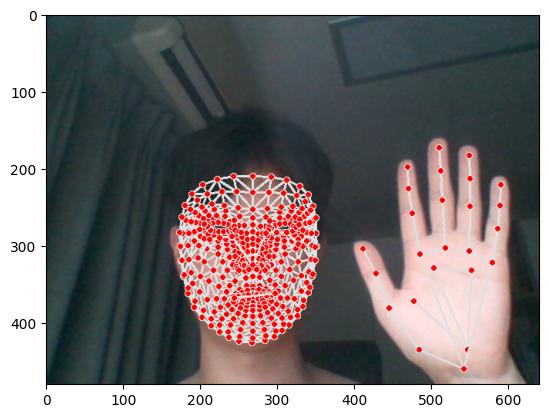

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.41960675,  0.67762887, -1.18070376, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.41960675,  0.67762887, -1.18070376, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [19]:
import os
import json
import numpy as np
import glob
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [20]:
# AI Hub 데이터 경로 설정
KEYPOINTS_DIR = r"d:/label/SEN/keypoint/06" # 키포인트 디렉토리 경로
MORPHEME_DIR = r"d:/label/SEN/morpheme/06"  # 형태소 디렉토리 경로


In [21]:

# 한국어 수화 단어 목록 생성 함수
def get_unique_actions():
    """모든 morpheme 파일에서 고유한 수화 단어(액션) 목록을 추출"""
    # 고유한 액션 단어를 저장할 집합
    unique_actions = set()
    
    # 모든 morpheme 파일 경로 가져오기
    morpheme_files = []
    for root, dirs, files in os.walk(MORPHEME_DIR):
        for file in files:
            if file.endswith('_morpheme.json'):
                morpheme_files.append(os.path.join(root, file))
    
    # 각 파일에서 액션 단어 추출
    for file_path in morpheme_files:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            for item in data.get('data', []):
                for attr in item.get('attributes', []):
                    if 'name' in attr:
                        unique_actions.add(attr['name'])
    
    return np.array(list(unique_actions))
    # list에는 [가다, 가르다, 가리다, 가리키다, 가리킴, 가리키다]와 같은 단어들이 들어있음
    # np.array로 변환하여 반환

In [22]:
# 키포인트 파일에서 프레임 데이터 추출 함수
def extract_keypoints_from_json(keypoints_file):
    """JSON 파일에서 키포인트 데이터 추출"""
    with open(keypoints_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # 키포인트 데이터가 있는지 확인
    if 'people' not in data:
        return None
    
    people_data = data['people']
    
    # MediaPipe와 OpenPose 형식이 다르므로 변환 필요
    # 여기서는 OpenPose 형식으로 가정
    pose_keypoints = np.array(people_data.get('pose_keypoints_2d', []))
    face_keypoints = np.array(people_data.get('face_keypoints_2d', []))
    left_hand_keypoints = np.array(people_data.get('hand_left_keypoints_2d', []))
    right_hand_keypoints = np.array(people_data.get('hand_right_keypoints_2d', []))
    
    # 빈 데이터 처리
    if len(pose_keypoints) == 0:
        pose_keypoints = np.zeros(33*3)  # x, y, confidence
    if len(face_keypoints) == 0:
        face_keypoints = np.zeros(468*3)
    if len(left_hand_keypoints) == 0:
        left_hand_keypoints = np.zeros(21*3)
    if len(right_hand_keypoints) == 0:
        right_hand_keypoints = np.zeros(21*3)
    
    # 키포인트 형식 변환
    # 각 키포인트 그룹은 [x, y, confidence] 형태로 그룹화
    return np.concatenate([pose_keypoints, face_keypoints, left_hand_keypoints, right_hand_keypoints])
    # np.concatenate를 사용하여 모든 키포인트를 하나의 배열로 결합

In [23]:
# morpheme 파일에서 시간 정보 및 라벨 추출 함수
def get_action_frames(video_id, frame_rate=30):
    """morpheme 파일에서 프레임별 라벨 정보 추출"""
    # 비디오 ID에서 morpheme 파일 경로 구성
    morpheme_path = glob.glob(f"{MORPHEME_DIR}/**/{video_id}_morpheme.json", recursive=True)
    
    if not morpheme_path:
        return None
    
    with open(morpheme_path[0], 'r', encoding='utf-8') as f:
        morpheme_data = json.load(f)
    
    action_frames = {}
    for item in morpheme_data.get('data', []):
        start_time = item.get('start', 0)
        end_time = item.get('end', 0)
        start_frame = int(start_time * frame_rate)
        end_frame = int(end_time * frame_rate)
        
        # 액션 이름 추출
        action_name = None
        for attr in item.get('attributes', []):
            if 'name' in attr:
                action_name = attr['name']
                break
        
        if action_name:
            for frame in range(start_frame, end_frame + 1):
                action_frames[frame] = action_name
    
    return action_frames

In [24]:
def create_dataset(sequence_length=10):
    """AI Hub 데이터로 데이터셋 생성"""
    # 모든 액션(수화 단어) 목록 가져오기
    actions = get_unique_actions()
    print(f"총 {len(actions)}개의 수화 단어가 발견되었습니다.")
    
    # 액션 라벨 매핑 생성
    label_map = {label: num for num, label in enumerate(actions)}
    
    # 결과 저장 변수
    sequences = []
    labels = []
    
    # 모든 비디오 ID 찾기
    video_ids = set()
    for root, dirs, files in os.walk(KEYPOINTS_DIR):
        for file in files:
            if file.endswith('_keypoints.json'):
                # 파일 이름에서 비디오 ID 추출
                video_id = "_".join(file.split('_')[:-2])  # _keypoints.json 부분 제외
                video_ids.add(video_id)
    
    print(f"총 {len(video_ids)}개의 비디오를 처리합니다.")
    
    # 각 비디오별로 데이터 처리
    for video_id in video_ids:
        # 해당 비디오의 모든 키포인트 파일 찾기
        keypoint_files = sorted(glob.glob(f"{KEYPOINTS_DIR}/**/{video_id}_*_keypoints.json", recursive=True))
        
        # 형태소 데이터에서 프레임별 라벨 가져오기
        action_frames = get_action_frames(video_id)
        
        if not action_frames:
            continue
        
        # 프레임 번호로 정렬된 키포인트 파일 매핑
        frame_to_keypoint = {}
        for kp_file in keypoint_files:
            # 파일 이름에서 프레임 번호 추출
            frame_num = int(kp_file.split('_')[-2])
            frame_to_keypoint[frame_num] = kp_file
            #여기까지........................... 이해해
        
        # 프레임을 순회하며 시퀀스 생성
        current_sequence = []
        current_label = None
        
        for frame_num in sorted(action_frames.keys()):
            if frame_num not in frame_to_keypoint:
                continue
                
            action_name = action_frames[frame_num]
            
            # 새로운 액션이 시작되면 새 시퀀스 시작
            if current_label != action_name and current_sequence:
                # 시퀀스 길이가 sequence_length와 같거나 크면 데이터 저장
                if len(current_sequence) >= sequence_length:
                    # sequence_length 길이의 창으로 슬라이딩
                    for i in range(0, len(current_sequence) - sequence_length + 1, sequence_length // 3):
                        window = current_sequence[i:i+sequence_length]
                        if len(window) == sequence_length:
                            sequences.append(window)
                            labels.append(label_map[current_label])
                
                # 새 시퀀스 시작
                current_sequence = []
            
            # 키포인트 추출 및 시퀀스에 추가
            keypoints = extract_keypoints_from_json(frame_to_keypoint[frame_num])
            if keypoints is not None:
                current_sequence.append(keypoints)
                current_label = action_name
        
        # 마지막 시퀀스 처리
        if current_sequence and len(current_sequence) >= sequence_length:
            for i in range(0, len(current_sequence) - sequence_length + 1, sequence_length // 2):
                window = current_sequence[i:i+sequence_length]
                if len(window) == sequence_length:
                    sequences.append(window)
                    labels.append(label_map[current_label])
    
    # 결과 반환
    return np.array(sequences), np.array(labels), actions, label_map

In [25]:
# # 데이터셋 생성
# sequences, labels, actions, label_map = create_dataset(sequence_length=30)

# print(f"생성된 시퀀스 수: {len(sequences)}")
# print(f"시퀀스 형태: {sequences.shape}")
# print(f"라벨 형태: {labels.shape}")

# # 데이터 전처리
# X = np.array(sequences)
# y = to_categorical(labels).astype(int)

# # 학습/테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# print(f"학습 데이터 형태: {X_train.shape}")
# print(f"테스트 데이터 형태: {X_test.shape}")
# print(f"학습 라벨 형태: {y_train.shape}")
# print(f"테스트 라벨 형태: {y_test.shape}")

In [26]:
# def augment_sequence(seq, augment_type='all'):
#     augmented = seq.copy()
    
#     if augment_type in ['noise', 'all']:
#         # 노이즈 추가 (기존)
#         augmented += np.random.normal(0, 0.01, seq.shape)
    
#     if augment_type in ['scale', 'all']:
#         # 스케일 변화 (x, y 좌표 스케일링)
#         scale_factor = np.random.uniform(0.9, 1.1)
#         for frame_idx in range(len(augmented)):
#             # 프레임의 각 키포인트에 스케일 적용
#             # MediaPipe는 x,y,z 좌표로 구성됨을 가정
#             for i in range(0, len(augmented[frame_idx]), 3):  # x, y, z 단위로 스케일링
#                 augmented[frame_idx][i] *= scale_factor  # x 좌표
#                 augmented[frame_idx][i+1] *= scale_factor  # y 좌표
    
#     if augment_type in ['shift', 'all']:
#         # 위치 이동
#         shift_x = np.random.uniform(-0.05, 0.05)
#         shift_y = np.random.uniform(-0.05, 0.05)
#         for frame_idx in range(len(augmented)):
#             for i in range(0, len(augmented[frame_idx]), 3):
#                 augmented[frame_idx][i] += shift_x  # x 좌표
#                 augmented[frame_idx][i+1] += shift_y  # y 좌표
    
#     return augmented

In [27]:
# 시계열 데이터 증강 예시
def augment_sequence(seq):
    # 시간 왜곡, 노이즈 추가, 회전 등 적용
    augmented = seq.copy()
    # 랜덤 노이즈 추가
    augmented += np.random.normal(0, 0.01, seq.shape)
    return augmented

In [28]:
# #데이터셋 생성
# sequences, labels, actions, label_map = create_dataset(sequence_length=10)

# print(f"생성된 시퀀스 수: {len(sequences)}")
# print(f"시퀀스 형태: {sequences.shape}")
# print(f"라벨 형태: {labels.shape}")

# # 더 많은 증강 데이터 생성 (9배로 증가)
# augmented_sequences = []
# augmented_labels = []

# for i, seq in enumerate(sequences):
#     # 원본 데이터 추가
#     augmented_sequences.append(seq)
#     augmented_labels.append(labels[i])
    
#     # 다양한 유형의 증강 데이터 추가
#     augment_types = ['noise', 'scale', 'shift', 'all']
#     for augment_type in augment_types:
#         augmented_seq = augment_sequence(seq, augment_type)
#         augmented_sequences.append(augmented_seq)
#         augmented_labels.append(labels[i])
    
#     # 조합 적용
#     for _ in range(3):  # 3개 추가 조합
#         augmented_seq = augment_sequence(seq, 'all')
#         augmented_sequences.append(augmented_seq)
#         augmented_labels.append(labels[i])

# # 증강된 데이터로 학습 데이터 생성
# X = np.array(augmented_sequences)
# y = to_categorical(augmented_labels).astype(int)

# # 학습/테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# print(f"증강 후 총 시퀀스 수: {len(augmented_sequences)}")
# print(f"학습 데이터 형태: {X_train.shape}")
# print(f"테스트 데이터 형태: {X_test.shape}")

In [ ]:
sequences, labels, actions, label_map = create_dataset(sequence_length=10)

print(f"생성된 시퀀스 수: {len(sequences)}")
print(f"시퀀스 형태: {sequences.shape}")
print(f"라벨 형태: {labels.shape}")

# 기존 데이터를 5배로 증강
augmented_sequences = []
augmented_labels = []

for i, seq in enumerate(sequences):
    # 원본 데이터 추가
    augmented_sequences.append(seq)
    augmented_labels.append(labels[i])
    
    # 증강 데이터 추가
    for j in range(4):  # 4개의 변형 추가
        augmented_sequences.append(augment_sequence(seq))
        augmented_labels.append(labels[i])  # 같은 라벨 유지

# 증강된 데이터로 학습 데이터 생성
X = np.array(augmented_sequences)
y = to_categorical(augmented_labels).astype(int)

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

print(f"증강 후 총 시퀀스 수: {len(augmented_sequences)}")
print(f"학습 데이터 형태: {X_train.shape}")
print(f"테스트 데이터 형태: {X_test.shape}")

NameError: name 'sequences' is not defined

In [ ]:
# 생성된 데이터셋 저장
dataset_path = 'processed_dataset.npz'
np.savez(dataset_path, 
         sequences=sequences, 
         labels=labels, 
         actions=actions, 
         label_map=np.array(list(label_map.items())))

print(f"데이터셋이 '{dataset_path}' 경로에 저장되었습니다.")

데이터셋이 'processed_dataset.npz' 경로에 저장되었습니다.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

# 전체 키포인트 차원 확인
input_dim = X_train.shape[2]
print(f"입력 차원: {input_dim}")

# 모델 구성
model = Sequential()
model.add(LSTM(32, return_sequences=False, activation='relu', input_shape=(30, input_dim)))
model.add(Dropout(0.5))  # 더 강한 드롭아웃
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# 모델 컴파일
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])

# 모델 요약
model.summary()

입력 차원: 411
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30, 64)            121856    
                                                                 
 dropout_13 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_19 (LSTM)              (None, 30, 128)           98816     
                                                                 
 dropout_14 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_20 (LSTM)              (None, 64)                49408     
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 32)    

In [ ]:
# TensorBoard 콜백 설정
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# 조기 종료 설정
early_stopping = EarlyStopping(
    monitor='val_categorical_accuracy', 
    patience=20, 
    restore_best_weights=True,
    mode='max'
)

# 모델 체크포인트 설정 - 여기에 추가
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    filepath='best_sign_language_model.h5',
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# 콜백 리스트에 모델 체크포인트 추가
callbacks_list = [tb_callback, early_stopping, model_checkpoint]



# 모델 훈련
history = model.fit(
    X_train, y_train,
    epochs=30,  
    batch_size=32,
    validation_split=0.05,
    callbacks=callbacks_list  # 여기에 콜백 리스트 전달
)

Epoch 1/30
77/77 [==============================] - ETA: 0s - loss: 1.3538 - categorical_accuracy: 0.3594
Epoch 1: val_categorical_accuracy improved from -inf to 0.34615, saving model to best_sign_language_model.h5
77/77 [==============================] - 4s 47ms/step - loss: 1.3538 - categorical_accuracy: 0.3594 - val_loss: 1.3459 - val_categorical_accuracy: 0.3462
Epoch 2/30
77/77 [==============================] - ETA: 0s - loss: 1.3552 - categorical_accuracy: 0.3549
Epoch 2: val_categorical_accuracy improved from 0.34615 to 0.36154, saving model to best_sign_language_model.h5
77/77 [==============================] - 3s 40ms/step - loss: 1.3552 - categorical_accuracy: 0.3549 - val_loss: 1.3710 - val_categorical_accuracy: 0.3615
Epoch 3/30
77/77 [==============================] - ETA: 0s - loss: 1.3551 - categorical_accuracy: 0.3615
Epoch 3: val_categorical_accuracy did not improve from 0.36154
77/77 [==============================] - 4s 54ms/step - loss: 1.3551 - categorical_accurac

C:\Users\ggg09\AppData\Local\Temp\ipykernel_23044\3321153333.py:22: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ggg09\AppData\Local\Temp\ipykernel_23044\3321153333.py:22: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ggg09\AppData\Local\Temp\ipykernel_23044\3321153333.py:22: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ggg09\AppData\Local\Temp\ipykernel_23044\3321153333.py:22: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ggg09\AppData\Local\Temp\ipykernel_23044\3321153333.py:22: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ggg09\AppData\Local\Temp\ipykernel_23044\3321153333.py:22: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from

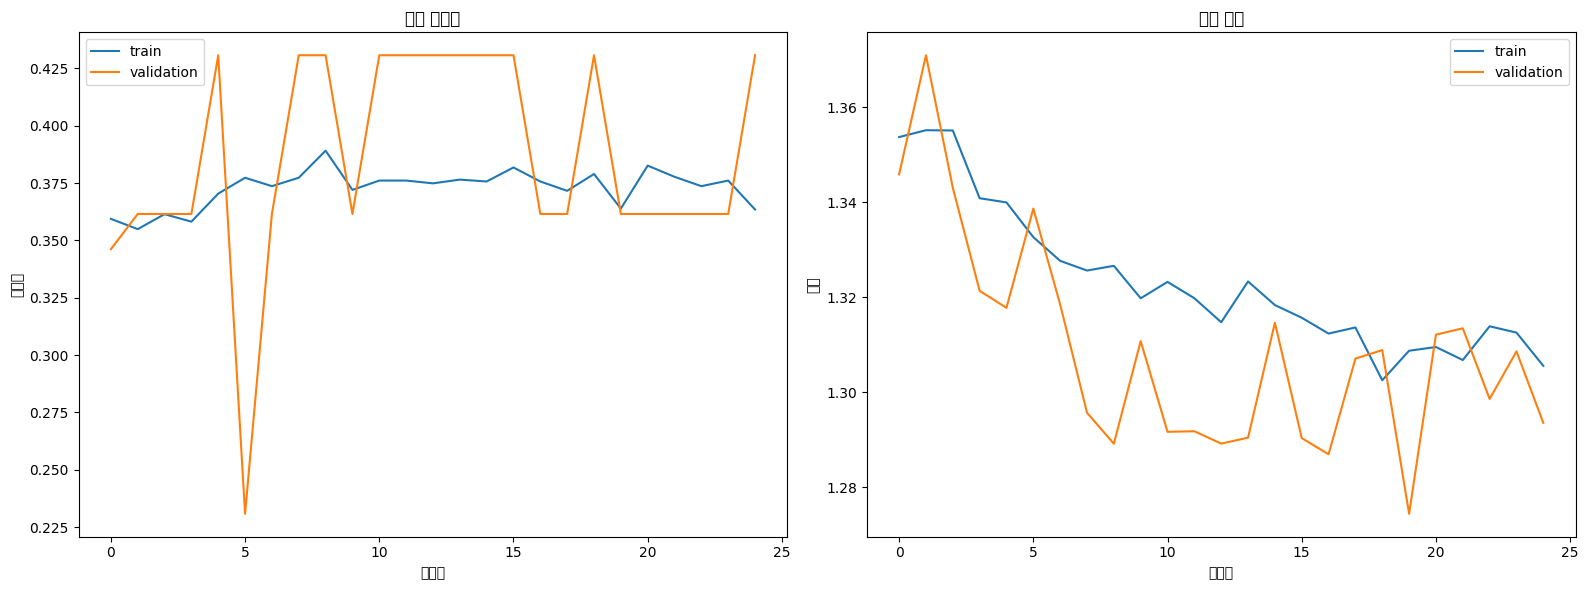

In [ ]:
# 훈련 과정 시각화
plt.figure(figsize=(16, 6))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='validation')
plt.title('모델 정확도')
plt.ylabel('정확도')
plt.xlabel('에포크')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('모델 손실')
plt.ylabel('손실')
plt.xlabel('에포크')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
# 저장된 최고 성능 모델 불러오기
best_model = load_model('best_sign_language_model.h5')

# 테스트 데이터로 평가
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f'최고 성능 모델의 테스트 정확도: {test_acc:.4f}')

5/5 [==============================] - 1s 14ms/step - loss: 1.3730 - categorical_accuracy: 0.3971
최고 성능 모델의 테스트 정확도: 0.3971


In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [ ]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

{'원하다': 0,
 '불가능': 1,
 '전': 2,
 '군청': 3,
 '스타벅스': 4,
 '지하철': 5,
 '찾다': 6,
 '저기': 7,
 '사용': 8,
 '불량': 9,
 '서울대학교': 10,
 '이화여대': 11,
 '다음': 12,
 '종로': 13,
 '보다': 14,
 '엘리베이터': 15,
 '잃어버리다': 16,
 '공항': 17,
 '길': 18,
 '방법': 19,
 '안되다': 20,
 '버스': 21,
 '목적': 22,
 '실종': 23,
 '병원': 24,
 '도착': 25,
 '내리다': 26,
 '고장': 27,
 '난방': 28,
 '차내리다': 29,
 '터널': 30,
 '없다': 31,
 '샛길': 32,
 '곳': 33,
 '택시': 34,
 '무엇': 35,
 '여기': 36,
 '백화점': 37,
 '잘': 38,
 '가다': 39,
 '우산': 40,
 '열쇠': 41,
 '에어컨': 42,
 '여의도': 43}

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

NameError: name 'DATA_PATH' is not defined

In [ ]:
np.array(sequences).shape

(180, 30, 1662)

In [ ]:
np.array(labels).shape

(180,)

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

(180, 30, 1662)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [ ]:
y_test.shape

(9, 3)

# 7. Build and Train LSTM Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[4])]

'hello'

In [ ]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[5, 0],
        [0, 4]],

       [[5, 0],
        [0, 4]],

       [[8, 0],
        [0, 1]]], dtype=int64)

In [ ]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: 'NormalizedLandmark' object is not iterable

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()